In [1]:
from matplotlib import pyplot as plt
import matplotlib
from matplotlib import cm
import math

In [2]:
if False: # Peak
    infile = '/gpfs/alpine/gen006/proj-shared/joubert/andes/outs/runs12-peak2M-all-dtree.csv'
    indm, indk, indf, inde = 0, 1, 2, 4
    #mmin, kmin = 5000, 100000
    mmin, kmin = 0, 0
    mmax, kmax = 100000, 1000000
    #mmax, kmax = 1e5, 1e8
    pointsize=1
    mmod = 1
    ucap = .2
    #ucap = 1e30
    #lcap = 80

if False: # BSD runs10
    infile = '/gpfs/alpine/gen006/proj-shared/joubert/andes/outs/runs10-bsd-all-dtree.csv'
    indm, indk, indf, inde = 0, 1, 2, 4
    #mmin, kmin = 5000, 100000
    mmin, kmin = 0, 0
    mmax, kmax = 100000, 2000000
    #mmax, kmax = 1e5, 1e8
    pointsize=1
    mmod = 8
    ucap = .2
    #ucap = 1e30
    #lcap = 80

if False: # BSD runs12
    infile = '/gpfs/alpine/gen006/proj-shared/joubert/andes/outs/runs12-bsd-all-dtree.csv'
    indm, indk, indf, inde = 0, 1, 2, 4
    #mmin, kmin = 5000, 100000
    mmin, kmin = 0, 0
    mmax, kmax = 100000, 2000000
    #mmax, kmax = 1e5, 1e8
    pointsize=2
    mmod = 8
    ucap = .2
    #ucap = 1e30
    #lcap = 80

if False: # BSD runs12 variability
    infile = '/gpfs/alpine/gen006/proj-shared/joubert/andes/outs/runs12-bsd-all-dtree.csv'
    indm, indk, indf, inde = 0, 1, 2, 5
    mmin, kmin = 0, 0
    #mmin, kmin = 5000, 100000
    mmax, kmax = 100000, 2000000
    #mmax, kmax = 100000, 100000000
    pointsize=2
    mmod = 8
    ucap = .7
    #lcap = 80

if False: # Spock
    infile = '/gpfs/alpine/gen006/proj-shared/joubert/andes/outs/runs12-spock4.2-all-dtree.csv'
    indm, indk, indf, inde = 0, 1, 2, 4
    #mmin, kmin = 5000, 100000
    mmin, kmin = 0, 0
    mmax, kmax = 100000, 1000000
    #mmax, kmax = 1e5, 1e8
    pointsize=1
    mmod = 1
    ucap = .2
    #ucap = 1e30
    #lcap = 80

if True: # Iris
    infile = '/gpfs/alpine/gen006/proj-shared/joubert/andes/outs/runs12-iris-all-dtree.csv'
    indm, indk, indf, inde = 0, 1, 2, 4
    #mmin, kmin = 5000, 100000
    mmin, kmin = 0, 0
    mmax, kmax = 100000, 1000000
    #mmax, kmax = 1e5, 1e8
    pointsize=1
    mmod = 1
    ucap = .2
    #ucap = 1e30
    #lcap = 80


In [84]:
#--------------------
# Acquire csv file.
#--------------------
import csv
csvfile = open(infile, newline='')
csvdata = list(csv.reader(csvfile, delimiter=',', quotechar='|'))

In [85]:
#--------------------
# Parse csv file
#--------------------
csvdata1 = [[int(float(v)) for v in r[0:2]] + [float(v) for v in r[2:]] for r in csvdata[1:]] 
#[int(float(r[0])), int(float(r[1])), float(r[2]), float(r[3])] for r in csvdata[1:]]
#csvdata1 = [[int(float(r[0])), int(float(r[1])), float(r[2]), float(r[3])] for r in csvdata[1:]]

csvdata1 = [r for r in csvdata1 if r[indm] < mmax and r[indk] < kmax and
                                   r[indm] >= mmin and r[indk] >= kmin and
                                   r[indm] % mmod == 0]
x = [r[indm] for r in csvdata1]
y = [r[indk] for r in csvdata1]
#f = [r[indf] for r in csvdata1]
e = [r[inde] for r in csvdata1]
#e = [math.log10(v if v >= .01 else .01) for v in e]

# cap the max value of the error
e = [val if val < ucap else ucap for val in e]
#f = [val if val > lcap else lcap for val in f]

# Print some stats

print(len(e))
timereldiffs_sorted = sorted(e)
for fraction in ['.90', '.99', '.999', '.9999', '1.0000']:
    ind = int(float(fraction) * (len(timereldiffs_sorted)-1))
    print('Fraction of ' + fraction + ' time predictions' +
          ' have rel error no more than ' + str(timereldiffs_sorted[ind]))


13677
Fraction of .90 time predictions have rel error no more than 0.0014153089209488626
Fraction of .99 time predictions have rel error no more than 0.1109288624395604
Fraction of .999 time predictions have rel error no more than 0.8951278163663473
Fraction of .9999 time predictions have rel error no more than 1.0699751291342714
Fraction of 1.0000 time predictions have rel error no more than 1.9118091685134526


0.2


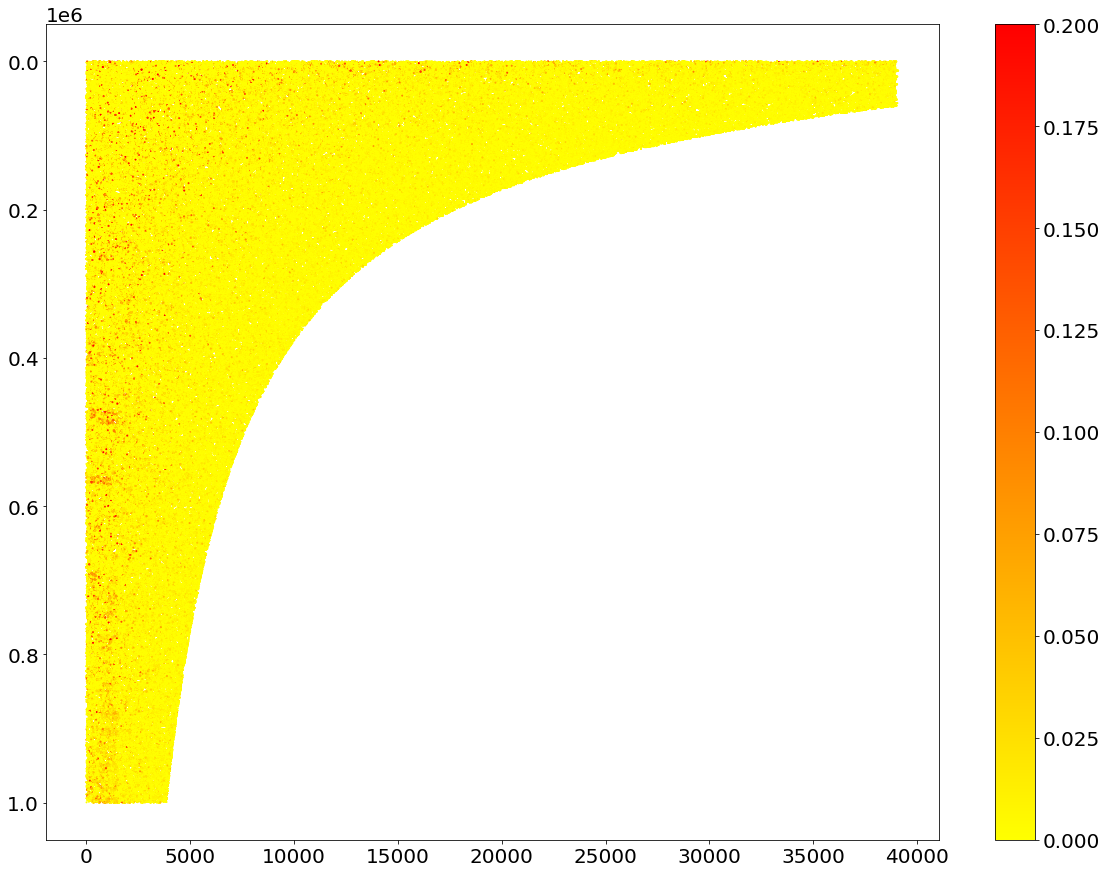

In [66]:
#--------------------
# Make plot
#--------------------
v = e
#v = f
maxv = max(v)
print(maxv)

plt.rcParams["figure.figsize"] = (20, 15)
#bgcolor = '#999999' # gray
bgcolor = '#ffffff' # white
plt.rcParams['axes.facecolor'] = bgcolor
plt.rcParams.update({'font.size': 20})
plt.gca().invert_yaxis()

# See https://matplotlib.org/stable/tutorials/colors/colormaps.html
#sc = plt.scatter(x, y, s=1, c=vcolor)
#plt.set_cmap('plasma')
sc = plt.scatter(x, y, s=pointsize, c=v, cmap='autumn_r') # YlOrRd # gnuplot_r # rainbow # gist_rainbow_r
#sc = plt.scatter(x, y, s=1, cmap=cm.get_cmap('plasma'))
plt.colorbar(sc)
#plt.set_cmap('plasma')

plt.show()
